In [1]:
from datasets.cifar10 import  CIFAR10Dataset
from datasets.dataset import Subset
from torchvision.models import resnet18
from dlvc.metrics import Accuracy
import torchvision.transforms.v2 as v2
from torch import optim
import torch 
from dlvc.trainer import ImgClassificationTrainer

train_transform = v2.Compose([v2.ToImage(), 
                        v2.ToDtype(torch.float32, scale=True),
                        v2.Normalize(mean = [0.485, 0.456,0.406], std = [0.229, 0.224, 0.225])])

val_transform = v2.Compose([v2.ToImage(), 
                        v2.ToDtype(torch.float32, scale=True),
                        v2.Normalize(mean = [0.485, 0.456,0.406], std = [0.229, 0.224, 0.225])])



In [2]:
model = resnet18()
optimizer = optim.Adam(model.parameters())
lr_scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma = 0.09)
loss_fn = torch.nn.CrossEntropyLoss()
train_data = CIFAR10Dataset("../data/cifar-10-python/cifar-10-batches-py", Subset.TRAINING, train_transform)
val_data = CIFAR10Dataset("../data/cifar-10-python/cifar-10-batches-py",Subset.VALIDATION, val_transform)
train_metric = Accuracy(classes=train_data.classes)
val_metric = Accuracy(classes=val_data.classes)
device = torch.device("cpu")

trainer = ImgClassificationTrainer(
    model,
    optimizer,
    loss_fn,
    lr_scheduler,
    train_metric,
    val_metric,
    train_data,
    val_data,
    device,
    num_epochs = 10,
    training_save_dir="weights/resnet18_bestmodel.pt",
    batch_size=64,
    val_frequency=1
)

In [3]:
trainer.train()


TRAIN, EPOCH: 0 
Loss: 1.6746073961257935
Accuracy: 0.3738
Class Accuracy: 0.3739792346954346

VALIDATION, EPOCH: 0 
Loss: 1.9291881322860718
Accuracy: 0.3947
Class Accuracy: 0.39496109997853635
Best mean per class accuracy on validation data set is higher. Saving new best model

TRAIN, EPOCH: 1 
Loss: 1.3286447525024414
Accuracy: 0.5465
Class Accuracy: 0.5460921257734299

VALIDATION, EPOCH: 1 
Loss: 1.2949434518814087
Accuracy: 0.6114
Class Accuracy: 0.6111475199460983
Best mean per class accuracy on validation data set is higher. Saving new best model

TRAIN, EPOCH: 2 
Loss: 0.9468143582344055
Accuracy: 0.6029
Class Accuracy: 0.602533432841301

VALIDATION, EPOCH: 2 
Loss: 0.8501143455505371
Accuracy: 0.6286
Class Accuracy: 0.6278560221195221
Best mean per class accuracy on validation data set is higher. Saving new best model

TRAIN, EPOCH: 3 
Loss: 1.2106692790985107
Accuracy: 0.6137
Class Accuracy: 0.6130549639463425

VALIDATION, EPOCH: 3 
Loss: 0.8644766807556152
Accuracy: 0.6314


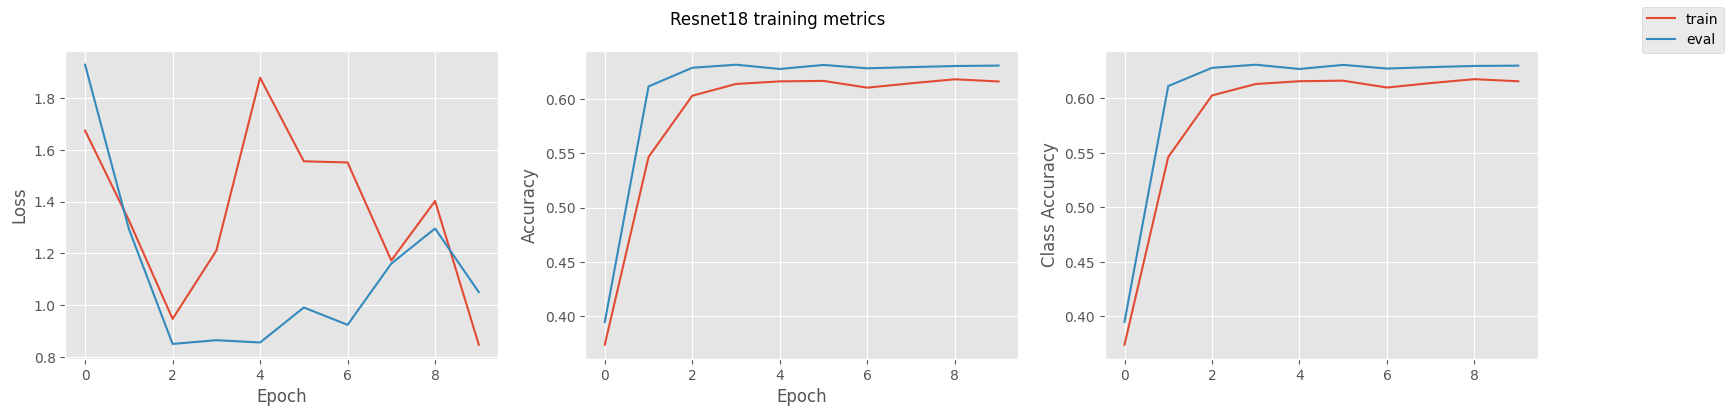

In [4]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')

metrics = trainer.metrics_train
metrics = list(zip(*metrics))
loss = metrics[0]
acc = metrics[1]
class_acc = metrics[2]


metrics_val = trainer.metrics_val
metrics_val = list(zip(*metrics_val))
loss_val = metrics_val[0]
acc_val = metrics_val[1]
class_acc_val = metrics_val[2]

fig, ax = plt.subplots(1,3, figsize = (19,4))
ax[0].plot(loss, label = "train")
ax[0].plot(loss_val, label = "eval")
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('Epoch')

ax[1].plot(acc)
ax[1].plot(acc_val)
ax[1].set_ylabel('Accuracy')
ax[1].set_xlabel('Epoch')

ax[2].plot(class_acc)
ax[2].plot(class_acc_val)
ax[2].set_ylabel('Class Accuracy')
ax[0].set_xlabel('Epoch')

fig.legend()
fig.suptitle("Resnet18 training metrics")
fig.savefig("../img/resnet_train.png")